# customer churn prediction

## load and data checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

In [2]:
import pandas as pd
import glob

csv_files =[r"C:/Users/nikhi/Downloads/customer churn prediction/churn data bigger/customer_churn_dataset-testing-master.csv",r"C:/Users/nikhi\Downloads/customer churn prediction/churn data bigger/customer_churn_dataset-training-master.csv"]
df_list=[pd.read_csv(file,encoding="ISO-8859-1") for file in csv_files]
combined_df=pd.concat(df_list,ignore_index=True)
combined_df.to_csv("combined.csv", index=False)

In [3]:
df=pd.read_csv("combined.csv",encoding="ISO-8859-1").copy()


In [4]:
df.head(10)

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         1.0  22.0  Female    25.0             14.0            4.0   
1         2.0  41.0  Female    28.0             28.0            7.0   
2         3.0  47.0    Male    27.0             10.0            2.0   
3         4.0  35.0    Male     9.0             12.0            5.0   
4         5.0  53.0  Female    58.0             24.0            9.0   
5         6.0  30.0    Male    41.0             14.0           10.0   
6         7.0  47.0  Female    37.0             15.0            9.0   
7         8.0  54.0  Female    36.0             11.0            0.0   
8         9.0  36.0    Male    20.0              5.0           10.0   
9        10.0  65.0    Male     8.0              4.0            2.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           27.0             Basic         Monthly        598.0   
1           13.0          Standard         Monthly        584.0   
2           29.0           Premium          Annual        757.0   
3           17.0           Premium       Quarterly        232.0   
4            2.0          Standard          Annual        533.0   
5           10.0           Premium         Monthly        500.0   
6           28.0             Basic       Quarterly        574.0   
7           18.0          Standard         Monthly        323.0   
8            8.0             Basic         Monthly        687.0   
9           23.0             Basic          Annual        995.0   

   Last Interaction  Churn  
0               9.0    1.0  
1              20.0    0.0  
2              21.0    0.0  
3              18.0    0.0  
4              18.0    0.0  
5              29.0    0.0  
6              14.0    1.0  
7              16.0    0.0  
8               8.0    0.0  
9              10.0    0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [6]:
df.describe()

CustomerID            Age         Tenure  Usage Frequency  \
count  505206.000000  505206.000000  505206.000000    505206.000000   
mean   200779.451782      39.704172      31.350435        15.714825   
std    137241.343095      12.670577      17.237482         8.619323   
min         1.000000      18.000000       1.000000         1.000000   
25%     63827.250000      29.000000      16.000000         8.000000   
50%    193039.500000      40.000000      32.000000        16.000000   
75%    321645.750000      49.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  505206.000000  505206.000000  505206.000000     505206.000000   
mean        3.833317      13.496843     620.072766         14.610581   
std         3.133603       8.451187     245.319256          8.608286   
min         0.000000       0.000000     100.000000          1.000000   
25%         1.000000       6.000000     446.000000          7.000000   
50%         3.000000      13.000000     648.900000         14.000000   
75%         6.000000      20.000000     824.000000         22.000000   
max        10.000000      30.000000    1000.000000         30.000000   

               Churn  
count  505206.000000  
mean        0.555203  
std         0.496944  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

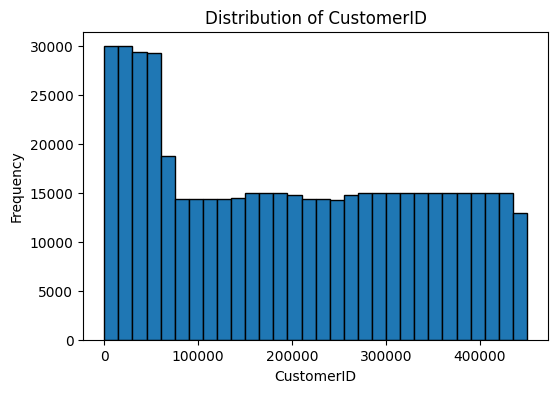

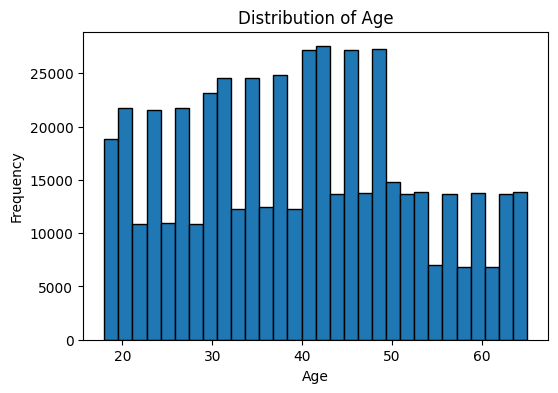

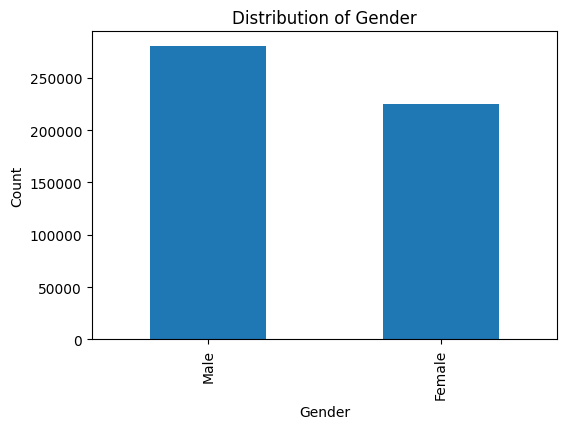

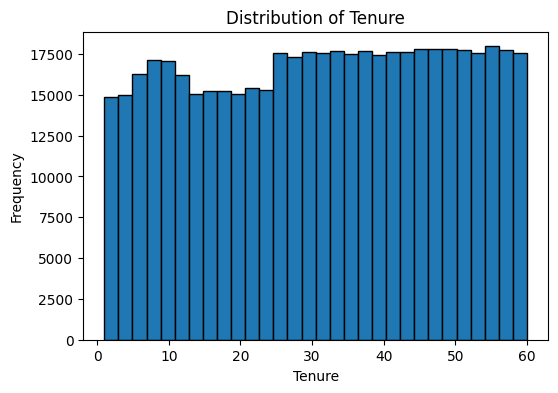

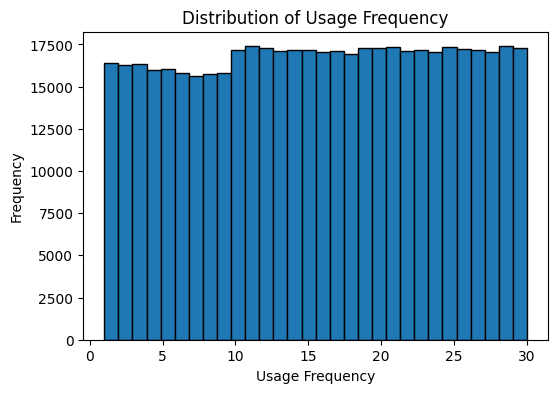

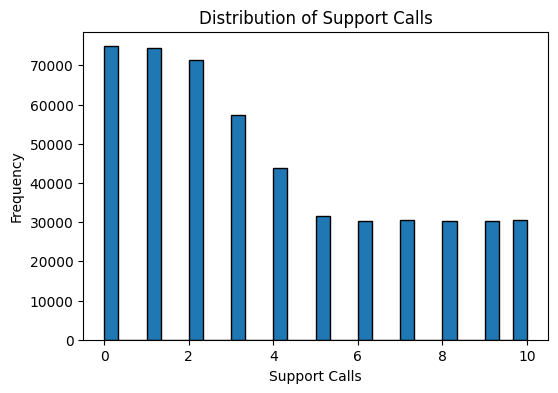

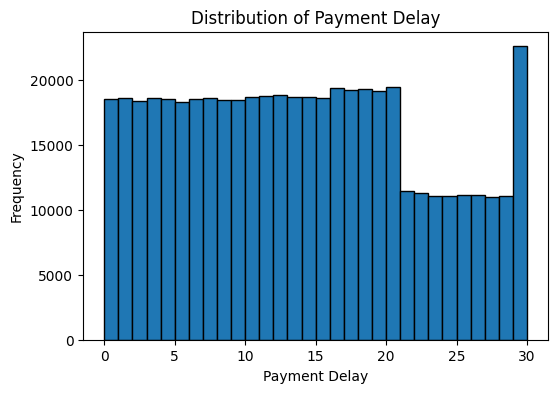

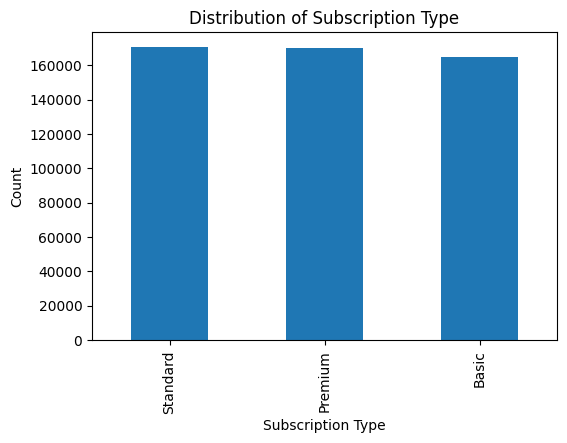

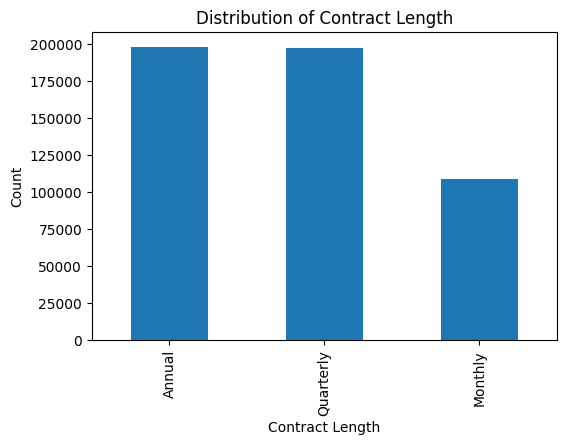

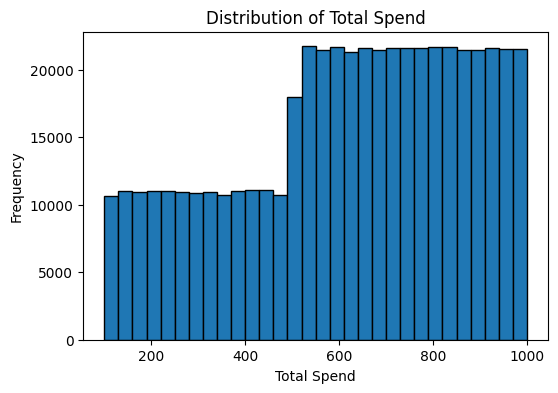

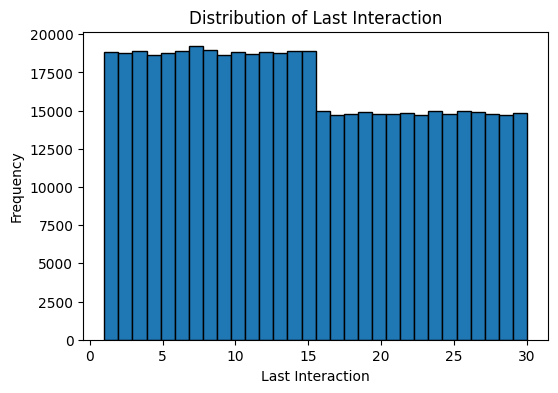

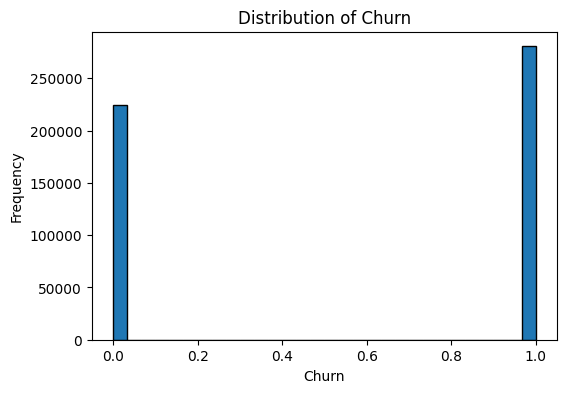

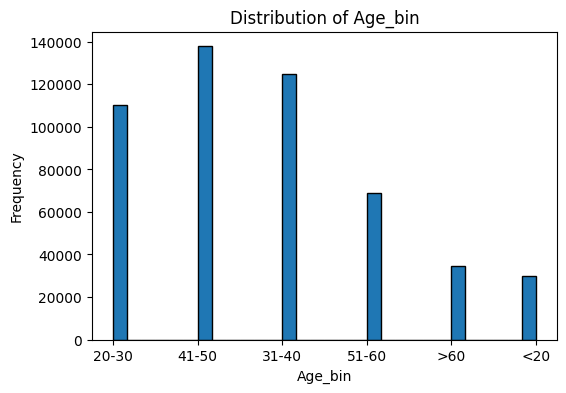

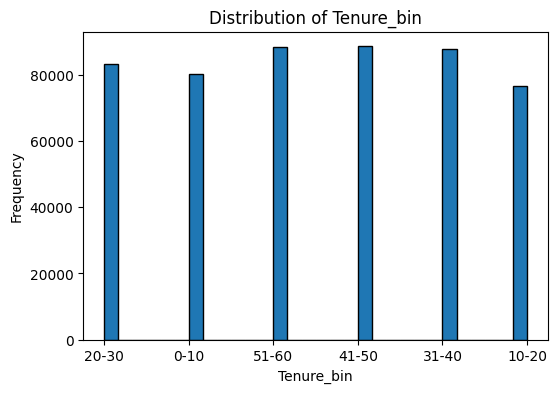

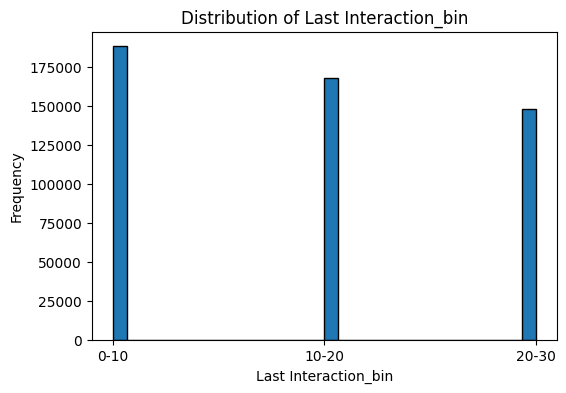

In [ ]:
for cols in df.columns:
    plt.figure(figsize=(6,4))
    
    if df[cols].dtype == 'object':  # categorical
        df[cols].value_counts().plot(kind='bar')
        plt.ylabel('Count')
    else:  # numerical
        plt.hist(df[cols].dropna(), bins=30, edgecolor='black')
        plt.ylabel('Frequency')
    
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.show()

In [7]:
column=['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']
for col in column:   
    print(f'{col}:'+f'{df[col].unique()}')


CustomerID:[1.00000e+00 2.00000e+00 3.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Age:[22. 41. 47. 35. 53. 30. 54. 36. 65. 46. 56. 31. 42. 59. 29. 45. 62. 48.
 55. 64. 25. 44. 28. 34. 24. 27. 61. 57. 37. 51. 18. 23. 60. 40. 26. 52.
 43. 19. 58. 33. 20. 39. 32. 38. 21. 63. 49. 50. nan]
Gender:['Female' 'Male' nan]
Tenure:[25. 28. 27.  9. 58. 41. 37. 36. 20.  8. 42. 13.  2. 46. 21.  1. 54. 40.
 39. 50. 59. 60. 44. 23. 26. 31. 30. 51. 45. 19. 14. 24. 15. 47.  3. 17.
 22. 57. 34. 29. 33. 35. 56.  5. 55. 48.  6. 32. 16. 10.  7. 43. 52. 53.
 38.  4. 11. 18. 49. 12. nan]
Usage Frequency:[14. 28. 10. 12. 24. 15. 11.  5.  4. 27. 23.  7. 17.  3. 30.  2. 19. 20.
 18.  8.  6. 21. 26. 16. 25. 13. 29.  9. 22.  1. nan]
Support Calls:[ 4.  7.  2.  5.  9. 10.  0.  6.  1.  3.  8. nan]
Payment Delay:[27. 13. 29. 17.  2. 10. 28. 18.  8. 23. 21. 14. 25.  3.  6. 15.  1.  9.
 30.  4.  0. 11. 16.  7. 24. 22. 12. 26. 20. 19.  5. nan]
Subscription Type:['Basic' 'Standard' 'Premium' nan]
Contract Length:

In [8]:
df['Last Interaction'].value_counts()

Last Interaction
7.0     19205
8.0     18972
14.0    18914
15.0    18907
6.0     18904
3.0     18873
1.0     18843
12.0    18840
10.0    18819
13.0    18800
5.0     18797
2.0     18781
11.0    18703
4.0     18628
9.0     18620
16.0    14990
24.0    14984
26.0    14976
27.0    14935
19.0    14913
30.0    14860
22.0    14849
28.0    14810
20.0    14808
21.0    14805
18.0    14772
25.0    14748
23.0    14738
29.0    14716
17.0    14696
Name: count, dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
263669         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
263669            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
263669               NaN    NaN

In [ ]:
df.dropna(inplace=True)


## type conversion

In [11]:

df[['Age','Churn','Tenure','Usage Frequency','Support Calls','Payment Delay','Last Interaction']]=df[['Age','Churn','Tenure','Usage Frequency','Support Calls','Payment Delay','Last Interaction']].astype(int)

## bins and feature engineering

In [ ]:
col_list=[ 'Usage Frequency',
       'Support Calls', 'Payment Delay', 
       'Contract Length', 'Total Spend', 'Last Interaction']
for col in col_list:
    val=df[col].unique().tolist()
    val.sort()
    display(col,val)
    vals = sorted(df['Support Calls'].dropna().unique())
    print(vals)

    missing = set(range(min(vals), max(vals)+1)) - set(vals)
    print("Missing values:", missing)

'Usage Frequency'

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Support Calls'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Payment Delay'

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Subscription Type'

['Basic', 'Premium', 'Standard']

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Contract Length'

['Annual', 'Monthly', 'Quarterly']

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Total Spend'

[100.0,
 100.02,
 100.06,
 100.07,
 100.08,
 100.09,
 100.11,
 100.12,
 100.13,
 100.16,
 100.17,
 100.18,
 100.19,
 100.2,
 100.25,
 100.26,
 100.28,
 100.33,
 100.34,
 100.35,
 100.38,
 100.39,
 100.4,
 100.42,
 100.45,
 100.46,
 100.47,
 100.49,
 100.5,
 100.51,
 100.54,
 100.55,
 100.59,
 100.63,
 100.65,
 100.71,
 100.72,
 100.75,
 100.77,
 100.82,
 100.83,
 100.85,
 100.89,
 100.94,
 100.99,
 101.0,
 101.03,
 101.05,
 101.06,
 101.08,
 101.09,
 101.1,
 101.11,
 101.17,
 101.18,
 101.2,
 101.21,
 101.22,
 101.23,
 101.27,
 101.33,
 101.34,
 101.35,
 101.38,
 101.39,
 101.4,
 101.41,
 101.45,
 101.48,
 101.49,
 101.51,
 101.52,
 101.56,
 101.57,
 101.58,
 101.61,
 101.64,
 101.65,
 101.68,
 101.7,
 101.74,
 101.78,
 101.81,
 101.83,
 101.84,
 101.86,
 101.89,
 101.91,
 101.94,
 101.95,
 102.0,
 102.02,
 102.06,
 102.07,
 102.08,
 102.09,
 102.1,
 102.13,
 102.14,
 102.16,
 102.17,
 102.25,
 102.26,
 102.28,
 102.3,
 102.31,
 102.34,
 102.36,
 102.39,
 102.41,
 102.43,
 102.44,
 102

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


'Last Interaction'

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Missing values: set()


In [12]:
ages=df['Age'].unique().tolist()
ages.sort()
ages

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65]

In [13]:
tenure=df['Tenure'].unique().tolist()
tenure.sort()
tenure

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [30]:

#age bins
age_bins=[0, 20, 30, 40, 50, 60, np.inf]
age_label=['<20','20-30','31-40','41-50','51-60','>60']
df["Age_bin"]=pd.cut(df['Age'],bins=age_bins,labels=age_label)
#tenure bins
tenure_bins=[0,10, 20, 30, 40, 50, 60, np.inf]
tenure_label=['0-10','10-20','20-30','31-40','41-50','51-60','>60']
df["Tenure_bin"]=pd.cut(df['Tenure'],bins=tenure_bins,labels=tenure_label)
#last interaction bins
interaction_bins=[0, 10, 20, 30, np.inf]
interaction_label=['0-10','10-20','20-30','30>']
df["Last Interaction_bin"]=pd.cut(df['Last Interaction'],bins=interaction_bins,labels=interaction_label)

## target balance/ratio

In [15]:
counts=df['Churn'].value_counts(normalize=True)
rate=df['Churn'].value_counts(normalize=True).mul(100).round(2)
df_cr={
    'counts':counts,
    'rate':rate,
    
}
cr_df=pd.DataFrame(df_cr)
display(cr_df)

counts   rate
Churn                 
1      0.555203  55.52
0      0.444797  44.48

In [39]:
cols_list = df.columns.tolist()
cols_list.remove('CustomerID')

retained = df[df['Churn'] == 0]
churned = df[df['Churn'] == 1]

def churn_rate(c: str) -> pd.DataFrame:
    cc = churned[c].value_counts(normalize=True, dropna=True).mul(100).round(2)
    rc = retained[c].value_counts(normalize=True, dropna=True).mul(100).round(2)
    idx = cc.index.union(rc.index)
    cc = cc.reindex(idx, fill_value=0)
    rc = rc.reindex(idx, fill_value=0)

    churn_rate_df = pd.DataFrame({
        'feature': idx,   # category values
        'column': c,      # column name
        'churned': cc,
        'retained': rc
    })
    return churn_rate_df

# Collect results
results = []
for col in cols_list:
    if col != 'Churn':
        results.append(churn_rate(col))

summary_df = pd.concat(results, ignore_index=True)

# Display per column
for col in cols_list:
    if col != 'Churn':
        print(f"Feature: {col}")
        display(summary_df[summary_df['column'] == col])

summary_df

Feature: Age


feature column  churned  retained
0       18    Age     2.10      1.60
1       19    Age     2.06      1.59
2       20    Age     2.05      2.31
3       21    Age     2.04      2.27
4       22    Age     2.07      2.27
5       23    Age     2.05      2.25
6       24    Age     2.05      2.21
7       25    Age     2.06      2.32
8       26    Age     2.05      2.32
9       27    Age     2.02      2.27
10      28    Age     2.04      2.30
11      29    Age     2.05      2.29
12      30    Age     2.02      2.92
13      31    Age     2.05      2.97
14      32    Age     2.00      2.92
15      33    Age     2.03      2.92
16      34    Age     2.00      2.92
17      35    Age     2.02      2.98
18      36    Age     2.05      2.98
19      37    Age     2.05      2.95
20      38    Age     2.07      2.97
21      39    Age     2.05      2.92
22      40    Age     1.97      3.60
23      41    Age     1.97      3.60
24      42    Age     1.99      3.69
25      43    Age     2.04      3.53
26      44    Age     2.00      3.59
27      45    Age     1.98      3.56
28      46    Age     2.00      3.57
29      47    Age     2.04      3.57
30      48    Age     1.97      3.60
31      49    Age     1.98      3.60
32      50    Age     1.93      4.17
33      51    Age     2.20      0.29
34      52    Age     2.20      0.30
35      53    Age     2.23      0.31
36      54    Age     2.22      0.29
37      55    Age     2.24      0.31
38      56    Age     2.21      0.30
39      57    Age     2.17      0.30
40      58    Age     2.20      0.29
41      59    Age     2.24      0.28
42      60    Age     2.19      0.30
43      61    Age     2.19      0.30
44      62    Age     2.14      0.30
45      63    Age     2.26      0.31
46      64    Age     2.22      0.30
47      65    Age     2.23      0.30

Feature: Gender


feature  column  churned  retained
48  Female  Gender    52.04     35.14
49    Male  Gender    47.96     64.86

Feature: Tenure


feature  column  churned  retained
50        1  Tenure     1.61      1.25
51        2  Tenure     1.63      1.30
52        3  Tenure     1.57      1.33
53        4  Tenure     1.63      1.33
54        5  Tenure     1.65      1.34
55        6  Tenure     1.57      1.88
56        7  Tenure     1.59      1.83
57        8  Tenure     1.61      1.81
58        9  Tenure     1.53      1.84
59       10  Tenure     1.57      1.86
60       11  Tenure     1.59      1.87
61       12  Tenure     1.56      1.42
62       13  Tenure     1.57      1.39
63       14  Tenure     1.60      1.35
64       15  Tenure     1.59      1.39
65       16  Tenure     1.59      1.41
66       17  Tenure     1.60      1.37
67       18  Tenure     1.65      1.35
68       19  Tenure     1.58      1.37
69       20  Tenure     1.58      1.40
70       21  Tenure     1.61      1.41
71       22  Tenure     1.65      1.38
72       23  Tenure     1.56      1.40
73       24  Tenure     1.72      1.31
74       25  Tenure     1.66      1.82
75       26  Tenure     1.70      1.79
76       27  Tenure     1.69      1.76
77       28  Tenure     1.67      1.75
78       29  Tenure     1.69      1.76
79       30  Tenure     1.78      1.76
80       31  Tenure     1.65      1.77
81       32  Tenure     1.75      1.80
82       33  Tenure     1.70      1.83
83       34  Tenure     1.71      1.77
84       35  Tenure     1.72      1.76
85       36  Tenure     1.66      1.81
86       37  Tenure     1.71      1.77
87       38  Tenure     1.74      1.78
88       39  Tenure     1.71      1.77
89       40  Tenure     1.66      1.78
90       41  Tenure     1.70      1.77
91       42  Tenure     1.73      1.78
92       43  Tenure     1.72      1.79
93       44  Tenure     1.68      1.82
94       45  Tenure     1.71      1.81
95       46  Tenure     1.74      1.80
96       47  Tenure     1.73      1.80
97       48  Tenure     1.73      1.81
98       49  Tenure     1.73      1.84
99       50  Tenure     1.70      1.81
100      51  Tenure     1.71      1.76
101      52  Tenure     1.73      1.83
102      53  Tenure     1.71      1.80
103      54  Tenure     1.70      1.75
104      55  Tenure     1.78      1.77
105      56  Tenure     1.72      1.84
106      57  Tenure     1.75      1.80
107      58  Tenure     1.71      1.77
108      59  Tenure     1.72      1.73
109      60  Tenure     1.68      1.83

Feature: Usage Frequency


feature           column  churned  retained
110       1  Usage Frequency     3.68      2.71
111       2  Usage Frequency     3.67      2.66
112       3  Usage Frequency     3.54      2.85
113       4  Usage Frequency     3.50      2.74
114       5  Usage Frequency     3.51      2.76
115       6  Usage Frequency     3.37      2.83
116       7  Usage Frequency     3.21      2.94
117       8  Usage Frequency     3.31      2.87
118       9  Usage Frequency     3.33      2.90
119      10  Usage Frequency     3.27      3.57
120      11  Usage Frequency     3.32      3.59
121      12  Usage Frequency     3.29      3.59
122      13  Usage Frequency     3.26      3.57
123      14  Usage Frequency     3.30      3.52
124      15  Usage Frequency     3.25      3.58
125      16  Usage Frequency     3.25      3.53
126      17  Usage Frequency     3.26      3.55
127      18  Usage Frequency     3.21      3.51
128      19  Usage Frequency     3.31      3.56
129      20  Usage Frequency     3.28      3.60
130      21  Usage Frequency     3.31      3.59
131      22  Usage Frequency     3.29      3.51
132      23  Usage Frequency     3.30      3.52
133      24  Usage Frequency     3.26      3.52
134      25  Usage Frequency     3.27      3.64
135      26  Usage Frequency     3.30      3.55
136      27  Usage Frequency     3.28      3.55
137      28  Usage Frequency     3.27      3.50
138      29  Usage Frequency     3.31      3.61
139      30  Usage Frequency     3.29      3.59

Feature: Support Calls


feature         column  churned  retained
140       0  Support Calls     7.97     23.35
141       1  Support Calls     7.92     23.22
142       2  Support Calls     7.89     21.92
143       3  Support Calls     8.25     15.27
144       4  Support Calls     8.67      8.72
145       5  Support Calls     9.85      1.76
146       6  Support Calls     9.83      1.16
147       7  Support Calls     9.96      1.12
148       8  Support Calls     9.84      1.16
149       9  Support Calls     9.87      1.16
150      10  Support Calls     9.95      1.15

Feature: Payment Delay


feature         column  churned  retained
151       0  Payment Delay     2.87      4.65
152       1  Payment Delay     2.83      4.73
153       2  Payment Delay     2.86      4.59
154       3  Payment Delay     2.89      4.66
155       4  Payment Delay     2.85      4.68
156       5  Payment Delay     2.84      4.61
157       6  Payment Delay     2.87      4.65
158       7  Payment Delay     2.87      4.68
159       8  Payment Delay     2.89      4.60
160       9  Payment Delay     2.86      4.62
161      10  Payment Delay     2.86      4.75
162      11  Payment Delay     2.93      4.69
163      12  Payment Delay     2.89      4.76
164      13  Payment Delay     2.88      4.72
165      14  Payment Delay     2.89      4.71
166      15  Payment Delay     2.91      4.65
167      16  Payment Delay     3.34      4.46
168      17  Payment Delay     3.29      4.43
169      18  Payment Delay     3.27      4.51
170      19  Payment Delay     3.25      4.47
171      20  Payment Delay     3.33      4.50
172      21  Payment Delay     3.85      0.28
173      22  Payment Delay     3.78      0.30
174      23  Payment Delay     3.72      0.27
175      24  Payment Delay     3.71      0.30
176      25  Payment Delay     3.74      0.29
177      26  Payment Delay     3.75      0.29
178      27  Payment Delay     3.68      0.30
179      28  Payment Delay     3.69      0.30
180      29  Payment Delay     3.77      0.28
181      30  Payment Delay     3.82      0.28

Feature: Subscription Type


feature             column  churned  retained
182     Basic  Subscription Type    33.36     31.56
183   Premium  Subscription Type    33.20     34.25
184  Standard  Subscription Type    33.44     34.19

Feature: Contract Length


feature           column  churned  retained
185     Annual  Contract Length    32.64     47.65
186    Monthly  Contract Length    35.13      4.77
187  Quarterly  Contract Length    32.24     47.59

Feature: Total Spend


feature       column  churned  retained
188     100.0  Total Spend     0.04      0.01
189    100.02  Total Spend     0.00      0.00
190    100.06  Total Spend     0.00      0.00
191    100.07  Total Spend     0.00      0.00
192    100.08  Total Spend     0.00      0.00
...       ...          ...      ...       ...
68546  999.96  Total Spend     0.00      0.00
68547  999.97  Total Spend     0.00      0.00
68548  999.98  Total Spend     0.00      0.00
68549  999.99  Total Spend     0.00      0.00
68550  1000.0  Total Spend     0.04      0.01

[68363 rows x 4 columns]

Feature: Last Interaction


feature            column  churned  retained
68551       1  Last Interaction     3.27      4.30
68552       2  Last Interaction     3.29      4.25
68553       3  Last Interaction     3.33      4.24
68554       4  Last Interaction     3.24      4.24
68555       5  Last Interaction     3.29      4.26
68556       6  Last Interaction     3.30      4.29
68557       7  Last Interaction     3.37      4.34
68558       8  Last Interaction     3.30      4.32
68559       9  Last Interaction     3.28      4.19
68560      10  Last Interaction     3.27      4.29
68561      11  Last Interaction     3.28      4.23
68562      12  Last Interaction     3.30      4.27
68563      13  Last Interaction     3.30      4.25
68564      14  Last Interaction     3.29      4.31
68565      15  Last Interaction     3.32      4.27
68566      16  Last Interaction     3.39      2.44
68567      17  Last Interaction     3.33      2.39
68568      18  Last Interaction     3.35      2.39
68569      19  Last Interaction     3.39      2.41
68570      20  Last Interaction     3.34      2.42
68571      21  Last Interaction     3.37      2.38
68572      22  Last Interaction     3.39      2.38
68573      23  Last Interaction     3.37      2.35
68574      24  Last Interaction     3.39      2.44
68575      25  Last Interaction     3.36      2.36
68576      26  Last Interaction     3.41      2.41
68577      27  Last Interaction     3.38      2.43
68578      28  Last Interaction     3.36      2.40
68579      29  Last Interaction     3.36      2.36
68580      30  Last Interaction     3.38      2.39

Feature: Age_bin


feature   column  churned  retained
68581     <20  Age_bin     6.21      5.51
68582   20-30  Age_bin    20.46     23.42
68583   31-40  Age_bin    20.29     30.12
68584   41-50  Age_bin    19.91     36.47
68585   51-60  Age_bin    22.10      2.96
68586     >60  Age_bin    11.04      1.51

Feature: Tenure_bin


feature      column  churned  retained
68587    0-10  Tenure_bin    15.97     15.79
68588   10-20  Tenure_bin    15.91     14.31
68589   20-30  Tenure_bin    16.73     16.13
68590   31-40  Tenure_bin    17.00     17.85
68591   41-50  Tenure_bin    17.17     18.02
68592   51-60  Tenure_bin    17.22     17.89
68593     >60  Tenure_bin     0.00      0.00

Feature: Last Interaction_bin


feature                column  churned  retained
68594    0-10  Last Interaction_bin    32.96     42.72
68595   10-20  Last Interaction_bin    33.27     33.38
68596   20-30  Last Interaction_bin    33.77     23.89
68597     30>  Last Interaction_bin     0.00      0.00

feature                column  churned  retained
0          18                   Age     2.10      1.60
1          19                   Age     2.06      1.59
2          20                   Age     2.05      2.31
3          21                   Age     2.04      2.27
4          22                   Age     2.07      2.27
...       ...                   ...      ...       ...
68593     >60            Tenure_bin     0.00      0.00
68594    0-10  Last Interaction_bin    32.96     42.72
68595   10-20  Last Interaction_bin    33.27     33.38
68596   20-30  Last Interaction_bin    33.77     23.89
68597     30>  Last Interaction_bin     0.00      0.00

[68598 rows x 4 columns]

In [41]:
import plotly.express as px

for col in cols_list:
    if col != 'Churn':
        print(f"Feature: {col}")
        
        # Filter by column name
        temp = summary_df[summary_df['column'] == col]
        
        # Melt churned/retained into long format
        temp_melted = temp.melt(
            id_vars=['feature','column'],
            value_vars=['churned','retained'],
            var_name='Status',
            value_name='Percentage'
        )
        
        # Plot
        fig = px.bar(
            temp_melted,
            x='feature',
            y='Percentage',
            color='Status',
            barmode='group',
            title=f'Customer churn by {col}'
        )
        fig.show()

Feature: Age


Feature: Gender


Feature: Tenure


Feature: Usage Frequency


Feature: Support Calls


Feature: Payment Delay


Feature: Subscription Type


Feature: Contract Length


Feature: Total Spend


Feature: Last Interaction


Feature: Age_bin


Feature: Tenure_bin


Feature: Last Interaction_bin


In [45]:
for col in cols_list:
    sns.boxplot(df=summary_df,x=col)
    plt.show()
  


ValueError: Could not interpret value `Age` for `x`. Value is a string, but `data` was not passed.